# Tentativa de análise estatística inferencial de dados econômicos do Brasil

### Dados analizados:
- https://sidra.ibge.gov.br/tabela/1737
- https://sidra.ibge.gov.br/tabela/1419

In [1]:
# importação das bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Tratamento do arquivo original para um arquivo csv (executado apenas uma vez):

In [ ]:
'''
﻿Tabela 1737 - IPCA - Série histórica com número-índice, variação mensal e variações acumuladas em 3 meses, em 6 meses, no ano e em 12 meses (a partir de dezembro/1979)
Brasil
Fonte: IBGE - Índice Nacional de Preços ao Consumidor Amplo

Notas
1 - Período de coleta ajustado ao mês civil (do primeiro ao trigésimo dia de cada mês), para os meses anteriores a março de 1986.

Legenda
Símbolo	Significado
-	Zero absoluto, não resultante de um cálculo ou arredondamento.
Ex: Em determinado município não existem pessoas de 14 anos de idade sem instrução.
0	Zero resultante de um cálculo ou arredondamento.
Ex: A inflação do feijão em determinada Região Metropolitana foi 0.
Determinado município produziu 400 kg de sementes de girassol e os dados da tabela são expressos em toneladas.
X	Valor inibido para não identificar o informante.
Ex: Determinado município só possui uma empresa produtora de cimento, logo o valor de sua produção deve ser inibido.
..	Valor não se aplica.
Ex: Não se pode obter o total da produção agrícola em determinado município quando os produtos agrícolas são contabilizados com unidades de medida distintas.
...	Valor não disponível.
Ex: A produção de feijão em determinado município não foi pesquisada ou determinado município não existia no ano da pesquisa.
A a Z
(exceto X)	Significa uma faixa de valores. Varia em função da tabela (se for o caso).
Ex: O nível de precisão da produção estimada de combustíveis está na faixa A (95 a 100%)
'''
data = pd.read_csv('tabela1737.tsv', sep='\t').replace('...', np.nan).drop(columns=['Unnamed: 4'])
data.to_csv('-tabela1737.csv', index=False)

### 1.0 Importar dados:

#### Para facilitar a análise os dados serão armazenados no formato de matriz (numpy array), sendo cada linha uma variável e cada coluna a data que a informação foi coletada.

 - A variável `month` armazena as datas para ter referência.
 - A variável `variable` armazena as variáveis para ter referência.

In [2]:
df = pd.read_csv('tabela1737.csv')
df

,Mês,Variável,Valor,Un
0,dezembro 1979,IPCA - Número-índice (base: dezembro de 1993 =...,7.618300e-09,Número-índice
1,dezembro 1979,IPCA - Variação mensal,NaN,NaN
2,dezembro 1979,IPCA - Variação acumulada em 3 meses,NaN,NaN
3,dezembro 1979,IPCA - Variação acumulada em 6 meses,NaN,NaN
4,dezembro 1979,IPCA - Variação acumulada no ano,NaN,NaN
...,...,...,...,...
2995,julho 2021,IPCA - Variação mensal,9.600000e-01,%
2996,julho 2021,IPCA - Variação acumulada em 3 meses,2.340000e+00,%
2997,julho 2021,IPCA - Variação acumulada em 6 meses,4.500000e+00,%
2998,julho 2021,IPCA - Variação acumulada no ano,4.760000e+00,%


In [25]:
from datetime import datetime

month, variable = [], list(set(df['Variável']))
for date in set(df['Mês']):
    m, y = date.split(' ')
    m = {'janeiro':'01', 'fevereiro':'02', 'março':'03', 'abril':'04',
     'maio':'05', 'junho':'06', 'julho':'07', 'agosto':'08', 
     'setembro':'09', 'outubro':'10', 'novembro':'11', 'dezembro':'12'}[m]
    month.append(datetime.strptime(m+y, '%m%Y'))
month.sort()

data = np.array([df.loc[df['Variável'] == var]['Valor'] for var in variable])
print('Formato da matriz: ', data.shape, end='\n'*2+'Linhas:\n')
for i, var in enumerate(variable): print(i, var)
print('\nColunas:')
for i, var in enumerate(month): print(i, var)

Formato da matriz:  (6, 500)

Linhas:
0 IPCA - Variação acumulada em 3 meses
1 IPCA - Variação acumulada no ano
2 IPCA - Variação mensal
3 IPCA - Variação acumulada em 12 meses
4 IPCA - Variação acumulada em 6 meses
5 IPCA - Número-índice (base: dezembro de 1993 = 100)

Colunas:
0 1979-12-01 00:00:00
1 1980-01-01 00:00:00
2 1980-02-01 00:00:00
3 1980-03-01 00:00:00
4 1980-04-01 00:00:00
5 1980-05-01 00:00:00
6 1980-06-01 00:00:00
7 1980-07-01 00:00:00
8 1980-08-01 00:00:00
9 1980-09-01 00:00:00
10 1980-10-01 00:00:00
11 1980-11-01 00:00:00
12 1980-12-01 00:00:00
13 1981-01-01 00:00:00
14 1981-02-01 00:00:00
15 1981-03-01 00:00:00
16 1981-04-01 00:00:00
17 1981-05-01 00:00:00
18 1981-06-01 00:00:00
19 1981-07-01 00:00:00
20 1981-08-01 00:00:00
21 1981-09-01 00:00:00
22 1981-10-01 00:00:00
23 1981-11-01 00:00:00
24 1981-12-01 00:00:00
25 1982-01-01 00:00:00
26 1982-02-01 00:00:00
27 1982-03-01 00:00:00
28 1982-04-01 00:00:00
29 1982-05-01 00:00:00
30 1982-06-01 00:00:00
31 1982-07-01 00:

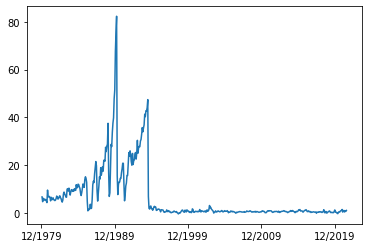

In [35]:
plt.plot(data[2])
x, xt = [], []
for t in range(0, len(data[5]), 120):
    x.append(t)
    xt.append(datetime.strftime(month[t], '%m/%Y'))
plt.xticks(x, xt)
plt.show()